# ESDC Data Access with Python

In [1]:
#from esdl import Cube
import xarray as xr
%matplotlib inline

In [2]:
# run julia notebook "python-interop-part1" bevor or choose an own zarr-file 

cube = xr.open_zarr("../Julia/data/cube_nomsc/")

/tmp/ipykernel_48036/289357878.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  cube = xr.open_zarr("../Julia/data/cube_nomsc/")


In [4]:
cube

<xarray.Dataset>
Dimensions:                            (lat: 23, lon: 41, time: 782)
Coordinates:
  * lat                                (lat) float64 54.62 54.38 ... 49.38 49.12
  * lon                                (lon) float64 14.12 14.38 ... 23.88 24.12
  * time                               (time) datetime64[ns] 2001-01-05 ... 2...
Data variables:
    gross_primary_productivity         (lat, lon, time) float32 ...
    net_ecosystem_exchange             (lat, lon, time) float32 ...
    terrestrial_ecosystem_respiration  (lat, lon, time) float32 ...

In [14]:
cube.time


<xarray.DataArray 'time' (time: 782)>
array(['2001-01-05T00:00:00.000000000', '2001-01-13T00:00:00.000000000',
       '2001-01-21T00:00:00.000000000', ..., '2017-12-15T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 ... 2017-12-31
Attributes:
    _ARRAY_OFFSET:  0

In [15]:
ds = cube #.data.dataset()

Now `ds` represents the entire cube data as an object of type [xarray.Dataset](http://xarray.pydata.org/en/stable/data-structures.html#dataset):

In [16]:
ds

<xarray.Dataset>
Dimensions:                            (lat: 23, lon: 41, time: 782)
Coordinates:
  * lat                                (lat) float64 54.62 54.38 ... 49.38 49.12
  * lon                                (lon) float64 14.12 14.38 ... 23.88 24.12
  * time                               (time) datetime64[ns] 2001-01-05 ... 2...
Data variables:
    gross_primary_productivity         (lat, lon, time) float32 ...
    net_ecosystem_exchange             (lat, lon, time) float32 ...
    terrestrial_ecosystem_respiration  (lat, lon, time) float32 ...

In [17]:
owe = ds['terrestrial_ecosystem_respiration']

The variable `lst` is an [xarray.DataArray](http://xarray.pydata.org/en/stable/data-structures.html#dataarray):

In [18]:
owe

<xarray.DataArray 'terrestrial_ecosystem_respiration' (lat: 23, lon: 41,
                                                       time: 782)>
[737426 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 54.62 54.38 54.12 53.88 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 ... 2017-12-31

The `DataArray.sel()` methods allows for selecting slices and subsets of data. 

In [20]:
owe_point = owe.sel(time='2005-06-15T12:00:00', lat=53, lon=0, method='nearest')

In [21]:
owe_point

<xarray.DataArray 'terrestrial_ecosystem_respiration' ()>
array(0.032792)
Coordinates:
    lat      float64 53.12
    lon      float64 14.12
    time     datetime64[ns] 2005-06-14

Data arrays and their subsets can be easily displayed using the `DataArray.plot()` method:

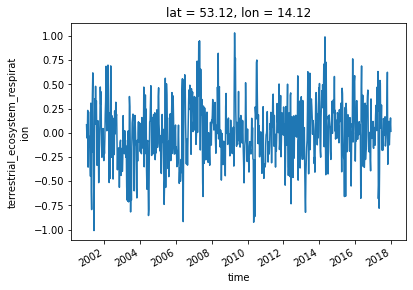

In [22]:
owe.sel(lat=53, lon=11, method='nearest').plot()

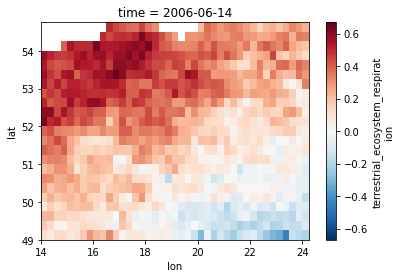

In [23]:
owe.sel(time='2006-06-15T12:00:00', method='nearest').plot()

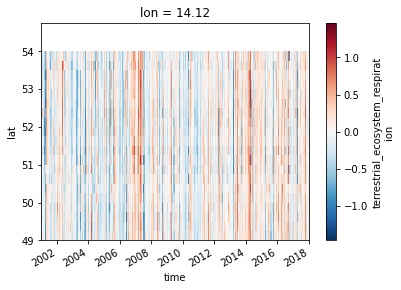

In [24]:
owe.sel(lon=11, method='nearest').plot()

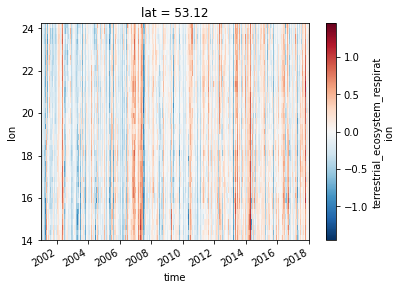

In [25]:
owe.sel(lat=53, method='nearest').plot()

In [27]:
oz = ds['net_ecosystem_exchange']

In [28]:
oz

<xarray.DataArray 'net_ecosystem_exchange' (lat: 23, lon: 41, time: 782)>
[737426 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 54.62 54.38 54.12 53.88 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 ... 2017-12-31

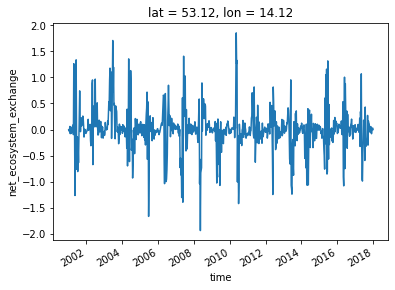

In [29]:
oz.sel(lat=53, lon=11, method='nearest').plot()

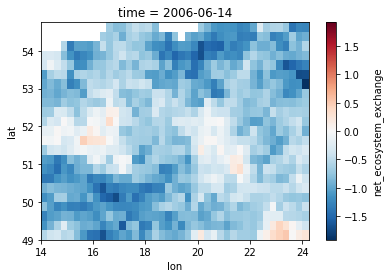

In [30]:
oz.sel(time='2006-06-15T12:00:00', method='nearest').plot()

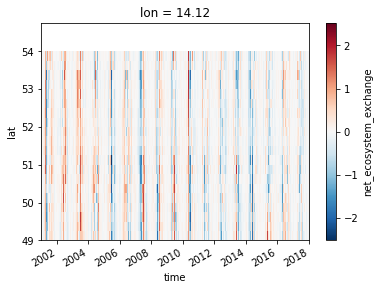

In [31]:
oz.sel(lon=11, method='nearest').plot()

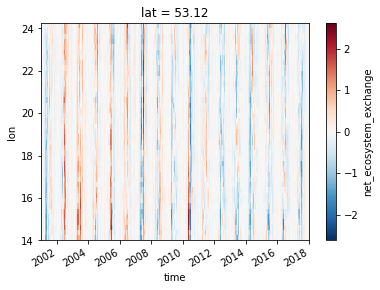

In [32]:
oz.sel(lat=53, method='nearest').plot()